- title: Statistical Distributions (Common ones)
- author: Alex
- date: 2022-10-17
- category: python

### Introduction
A probability distribution in statistics is a function that returns the possible values for a variable with different occurence rate (how often values occur). Distribution in nature and society tend to fit pattern with ocasionally occuring exceptions (isn't absence of pattern is a pattern too?).

####  Probability Mass Function
Discrete random variable has probability mass function (PMF) being a particular type of *probability distribution* that defines the probability of observing some value given particular parameter. Random variables and corresponding probability distributions may be applied on many different kinds of problems. 

Probability distributions have parameters that make them adaptable for different situations. Here I named a few common distributions:
* Normal Distribution
* Binomial Distribution
* Poisson Distribution
* Exponential Distribution
* Uniform Distribution

These are many other distributions. All distributions are used to model data depending on its characteristics. 

### Random Variables
Data is described using variables. Given a random variable FOO you can get different values. Think of your values that variable FOO can take as a output from some model. You can estimate probability of different outcomes for variable FOO. A probability distribution function assigns probabilies to values that FOO can possibly take.

Random variables represent random events: the outcome of a die roll represents integers from one to six. Random variables are often numeric, and in order to represent categorical data for events with non-numeric outcomes, we can assigned numbers to represent those outcomes: "heads" a value of 1 and "tails" a value of 0. Here we have a code to simulate random outcomes occuring several times:

In [ ]:
import numpy as np

die_6 = range(1, 7)
boys_girls = ('b','g')

rolls = np.random.choice(die_6, size = 12, replace = True)
births =  np.random.choice(boys_girls, size = 12, replace = True)
print(rolls)
print(births)

### Classification of Variables
Random variables are random in different ways:
* discrete variables are assigned one of a specified collection of values: count of two Fair Coins/Dices.
* continuous (arbitrarily exact values): time, speed.
* mixed.

*Discrete* variables are taking count values on a specified list (pixels, coins, votes) Think of light bulb, you can buy one or many, but can't buy half a bulb, neither 0.3 because these are uncountable. In this case, the values must be countable in that they are limited to whole numbers.If you one day buy less than one or one and a half, I then will need to update this article!

*Continuous* variables are taking precise  values from a range of values that are pecise (temperature, time, height). The value of 3.141592, as well as more precise values of pi are uncountable. Continuous variables progressively take the values more and more precise- each value from range of descriptive values must exist in order to arrive at the next one. 

When I drink some water (which I really do sometimes) the volume of my randomly chosen glass is a perfectly continuous variable taking values all the time even if I am not aware of every floating point value of volume that I am swallowing, wich is fine - measurements can always be more precise but I do not have time to think about all of them. Chances are good my drinking example made you thinking about *mixed* variables always having discrete component and continuous component. 

### Binomial Distribution

The binomial distribution is the probability mass function that describes the likelihood of each possible outcome (eg., 0 heads, 1 head, 2 heads, etc.). The parameters for the binomial distribution are:

    n for the number of events/ trials (eg., n=10 if we flip a coin 10 times)
    p for the probability of success in each trial (probability of observing a particular outcome in each trial).

In this example, p= 0.5 because the probability of observing heads on a fair coin flip is 0.5.

If we observe 10 events and multiply it by the chance of getting success (one-half) then we apply the equation for the expected value of the binomial distribution.


####  PMF Probability Mass Function for Discrete Case

For discrete variable its distribution is called a probability mass function, and it describes how discrete variable should behave.

Davidson-Pilon, Cameron. Bayesian Methods for Hackers (Addison-Wesley Data & Analytics) (p. 34). Pearson Education. Kindle Edition. 
Let’s say we flip a fair coin 10 times. Below is the code to compute probablity of observing one value of interest (heads) using probability mass function and find the probability of observing a range of values for a discrete random variable.
We get the probability of getting between 2 and 4 heads. We can visualize this scenario below.

In [ ]:
import scipy.stats as stats
import numpy as np

from scipy.stats import norm

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
# value of interest is the number of heads I can get
x = 5 
# number of trows, probability of success
n, p = 10, 0.5
stats.binom.pmf(x, n, p)  # 0.24609375000000003
_cumulative_pmf = [stats.binom.pmf(i,n,p) for i in range(10)]
print(_cumulative_pmf)
ax.plot(range(10), _cumulative_pmf, 'k-', lw=2, label='pdf')

ax.plot(range(2,5), _cumulative_pmf[2:5], 'r-', lw=5, label='pdf')

We can calculate the probability of observing 3 successes (heads in this case) using the **following equation**:

`P(2<=heads<=4)=P(X=2)+P(X=3)+P(X=4)`

P(2to4heads)=0.0439 + 0.1172 + 0.2051 = 0.3662
The probability of between 2 and 4 Heads : 36.62%

**Or Python**
```python
import scipy.stats as stats
 
# calculating P(2<=heads<=4heads) for flipping a coin 10 times
print(sum([stats.binom.pmf(i, n=10, p=.5) for i in [2,3,4]])) # 0.36621093749999994
``` 
pmf for many possible values of interest 
```python
# calculate P(0<=heads<=8 heads) for 10 flips
print(sum([stats.binom.pmf(i, n=10, p=.5) for i in range(0,9)]))
# we refactor is as follows: the sum of the probabilities for all possible values = 1:
# less than or equal to 8
1 - (sum([stats.binom.pmf(i, n=10, p=.5) for i in range(9,11)]))
# similarly the probability of observing more than 2 heads from 10 coin flips, notice 0 is included.
1 - (sum([stats.binom.pmf(i, n=10, p=.5) for i in range(0,3)]))
```

In [ ]:
import scipy.stats as stats
print(sum([stats.binom.pmf(i, n=10, p=.5) for i in [2,3,4]]))


####  CDF Cumulative Distribution Function for Discrete Case
Cumulative Distribution Function
: CDF is a function that computes the probability of observing a specific value or less. For ordered sequence of values the output of the CDF function will always be greater for the larger input. Plotted CDF on the graph shows how each y-axis value is the sum of the probabilities less than or equal to it in the PMF. 

Each y-axis value of CDF is the sum of the probabilities less than or equal to it in the PMF.

In [ ]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True


pmf = [stats.binom.pmf(i, n=10, p=.5) for i in range(0,11)]
cdf = np.cumsum(pmf)

ax.plot(range(11), cdf, 'k-', lw=2, label='pdf')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# data to plot
n, p = 10, 0.5
stats.binom.pmf(x, n, p)  # 0.24609375000000003
_cumulative_pmf = [stats.binom.pmf(i,n,p) for i in range(10)]
cdf = np.cumsum(_cumulative_pmf)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 1)

# Plot the data on the subplots
axs[0].plot(range(10), _cumulative_pmf, 'k-', lw=2, label='pdf')
axs[1].plot(range(10), cdf, 'k-', lw=2, label='pdf')

# Add titles to the subplots
axs[0].set_title('pdf')
axs[1].set_title('cdf')

# Add a main title to the figure
fig.suptitle('cdf-vs-pmf')

# Show the figure
plt.show()

### CDF for a Specific Range by Substraction
The difference between two values from the cumulative distribution function is the probability of getting values from a specific range. 

The probability of observing between 3 and 6 heads is computed like follows: ` CDF(x=6) - CDF(x=2) = P(3<=x<=6)`, which is identical to
probability to observe 6 or fewer heads minus probability of observing 2 or fewer heads `P(x<=6) - P(x<=2)` = 0.828-0.054 = 0.773 

Cumulative Distribution Function in Python computed as follows:

In [ ]:
import scipy.stats as stats
 
(stats.binom.cdf(6, 10, 0.5)) # 0.828125  is probability that given probability of single event 0.5 it is observed 5 or fewer heads from 10 fair coin flips
(stats.binom.cdf([2,3,4,5,6], 10, 0.5)) # [0.0546875  0.171875   0.37695312 0.62304688 0.828125]
print((stats.binom.cdf(6, 10, 0.5)) -(stats.binom.cdf(2, 10, 0.5))) # 0.7734375

# If we wanted to calculate the probability of observing between 2 and 5 heads from 10 fair coin flips, we could use the following code:
prob_2to5 = stats.binom.cdf(5,n=10,p=0.5) - stats.binom.cdf(1,n=10,p=0.5) 

This method takes 3 values:

    x: the value of interest, looking for the probability of this value or less
    n: the sample size
    p: the probability of success
As always some useful and detailed explanation is accessible via help(): 

In [ ]:
help(stats.binom.cdf)

### PDF for Continuous Case
A continuous random variable has a probability density function wich is different from pmf since it can compute probability of getting any positive values, including  for example a non-integral 3.14. The pdf define the probability distributions of continuous random variables and span across all possible values of a variable.

pdf graph is a bell shaped curve of probabilities that values can take. The total area for the plot of probabilities for the whole range of values add up to 1. Since variable is continuous it is impossible to quantify probability at a single point (since area under the point is always zero). For narrow interval the area under the curve is small: the area under the curve at a specific point, the width of that area becomes 0.
Some type of probability distribution consistently appear like for instance  very common one - normal distribution. For example, human heights fall under a normal distribution with its parameters: Normal(mean, standard deviation) as shorthand. Let's see how you compute area using cdf (cumulative distribution function) for a normal distribution. We can calculate the area under the curve using the cumulative distribution function for the given probability distribution.

To know the probability that a randomly chosen woman is less than 158 or 175 cm tall(158 and 175 are the value of interest here) we pass another parameters to norm.cdf function: a mean of 167.64 cm and a standard deviation of 8 cm: 

```python 
import scipy.stats as stats
 
# probability that a randomly chosen woman is less than 158 cm 
# given following parameters stats.norm.cdf(x, loc, scale)
print(stats.norm.cdf(158, 167.64, 8))  # 0.1141
# or the probability that a randomly chosen woman is less than 175 cm tall.
print(stats.norm.cdf(175, 167.64, 8)) # 0.8212

```

Given women’s heights have:
  a mean of 167.64 cm,  
  a standard deviation of 8 cm, 
Here is the cumulative distribution function used to calculate the area under the probability density function curve from 0 to 158 to find that probability. 

Below I plot cumulative density function (CDF) for human height using value of interest 175 and the probability density function (PDF). 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate some random data for human height
np.random.seed(0)
heights = np.random.normal(167.64, 8, 1000)  # Mean = 170, Standard Deviation = 10
value_of_interest = 175
# (CDF)
sorted_heights = np.sort(heights)
cdf = np.arange(1, len(sorted_heights) + 1) / len(sorted_heights)
cdf_value_of_interest = stats.norm.cdf(value_of_interest, loc=np.mean(heights), scale=np.std(heights))
#  (PDF)
x = np.linspace(130, 210, 100)  # Range of realistic values
pdf = stats.norm.pdf(x, loc=np.mean(heights), scale=np.std(heights))
pdf_value_of_interest = stats.norm.pdf(value_of_interest, loc=np.mean(heights), scale=np.std(heights))
# instantiate two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# CDF on the first subplot
ax1.plot(sorted_heights, cdf, label='CDF')
ax1.axvline(x=value_of_interest, ymin=0, ymax=cdf_value_of_interest, color='r', linestyle='--')
ax1.axhline(y=cdf_value_of_interest, xmin=0, xmax=value_of_interest, color='r', linestyle='--')
ax1.scatter(value_of_interest, cdf_value_of_interest, color='r', label='Value of Interest')
ax1.set_xlabel('Height')
ax1.set_ylabel('Cumulative Probability')
ax1.set_title('CDF of Human Height')
ax1.legend()

# PDF on the second subplot
ax2.plot(x, pdf, label='PDF')

# Highlight the range 165 to 175
range_start = 165
range_end = 175
ax2.fill_between(x, pdf, where=((x >= range_start) & (x <= range_end)),
                 alpha=0.3, color='g', label='165-175')
ax2.fill_between(x, pdf, where=((x <= range_start)),
                 alpha=0.3, color='r', label='<165')
ax2.fill_between(x, pdf, where=((x >= range_end)),
                 alpha=0.3, color='b', label='>175')
ax2.axvline(x=value_of_interest, ymin=0, ymax=pdf_value_of_interest, color='r', linestyle='--')
ax2.scatter(value_of_interest, pdf_value_of_interest, color='r', label='Value of Interest')
ax2.set_xlabel('Height')
ax2.set_ylabel('Probability Density')
ax2.set_title('PDF of Human Height')
ax2.legend()

plt.tight_layout()
plt.show()


The difference between y axis of those two plots is that the one on the right side is actually having the whole range of probablitiy stored under the bell-shaped polygon - the total area for the plot of probabilities for the whole range of values add up to 1. So imagine you need to get the probability of meet person between 165 and 175 cm height or simply more than 175. You see the area in green? That is the probability presented visually, run the code below to get the actual value of 0.45. The blue one is computed as 1 - p(175).

### Poisson Distribution
Here I documented how to use pmf to Calculate the Probability of Exact Values

The Poisson distribution is a discrete probability distribution, described by cdf and pmf. Poisson distribution comes out of the box with scipy.
Given expected parameter of a distribution (something is true 10 days of 31) you can get a probability of observing a specific count of expected outcome (is true 6  days). 

```python
import scipy.stats as stats
# given expected 10, get probability of getting 6
stats.poisson.pmf(6, 10)
```
To find the probability of observing a value in a range the individual probabilities sum up.
```python
stats.poisson.pmf(6, 10) + stats.poisson.pmf(7, 10) + stats.poisson.pmf(8, 10)
```


In [ ]:
import scipy.stats as stats
# P(165 < X < 175) = P(X < 175) - P(X < 165)
# stats.norm.cdf(x, loc, scale) - stats.norm.cdf(x, loc, scale)
# where loc and scale are the mean and standard deviation
print(stats.norm.cdf(175, 167.74, 8) - stats.norm.cdf(165, 167.74, 8))
# P(X > 165) = 1 - P(X <165)
# 1 - stats.norm.cdf(x, loc, scale)
print(1 - stats.norm.cdf(165, 167.74, 8))

### Calculate Probabilities Using Poisson CDF

Poisson distribution is a discrete probability distribution and the  details are beyond the scope of this article. I am glad that Wikipedia is run by enthusiastic content creators and I can check any details here <https://en.wikipedia.org/wiki/Poisson_distribution>.

Imagine I want to compute chances that it will be maximum 6 rainy days in June given fact that it tend to be 10 rainy days (average number of rainy days in June over years). The parameter that takes the value 6 in cdf is the parameter lambda (λ) or expected value. The parameter of average estimate 10 is a known constant mean rate.  
```python
import scipy.stats as stats
# expected value = 10, compute probability of getting upp untill 6
stats.poisson.cdf(6, 10)
```

Summing individual probabilities from probability mass function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) over a range can be skipped by means of substracting cdf. 

```python
# given a range take the difference between the CDF of the larger endpoint
# and the CDF of the smaller endpoint - 1
import scipy.stats as stats

# expected value = 10, probability of observing between 12 and 18
stats.poisson.cdf(18, 10) - stats.poisson.cdf(12-1, 10)
```


In [5]:
import numpy as np
from scipy.stats import poisson

# Define the average rate (λ) for the Poisson distribution
average_rate = 10

# Define the range of expected values
range_start = 12
range_end = 18
# substraction way using CDF
probability_range = stats.poisson.cdf(range_end, average_rate) - stats.poisson.cdf(range_start-1, average_rate)
# addition way using the PMF
probability_range = np.sum(poisson.pmf(np.arange(range_start, range_end + 1), average_rate))

# Print the result
print(f"The probability of getting an expected value between {range_start} and {range_end} is: {probability_range}")

The probability of getting an expected value between 12 and 18 is: 0.29603734909303986


### Parameter Lambda

Expected value of the Poisson distribution means that on average, across given period of time (or in space), we expect our average to equal about 10 items per time. If we do not have a survey we can get it another way: generate sample of 1000 random values from the Poisson distribution with the expected value of 10 using `scipy.stats.poisson.rvs()`. You set parameter size equal to 1000, to generate that many random variates from the Poisson distribution with lambda equal to 10.


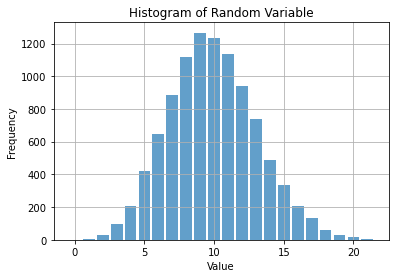

In [6]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as  np

# Generate random variable from Poisson distribution
# lambda = 10, 10000 random draws 
rvs = stats.poisson.rvs(10, size=10000)
rvs.mean() # 10.0291 notice expected value 10 is NOT EXACTLY but almost equal to this mean value 
# Plot the histogram
plt.hist(rvs, bins = np.arange(len(set(rvs)))-0.5, alpha=0.7, rwidth=0.85)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Random Variable')
plt.grid(True)

plt.show()

### Dispersion of Poisson

If values spread wider,then we have a larger variance.
For the Poisson distribution, the variance is simply the value of lambda (λ), the expected value is equivalent to variance. Increasing of expected value makes spread of distribution (variance of possible values) also increase.
Given the samples with different variance it is easy to compute variance using the numpy.var() method:


In [11]:
import scipy.stats as stats
import numpy as np
# for 4000 draws compute values of Poisson distribution 
rand_vars = stats.poisson.rvs(4, size = 4000) # array([2, 4, 6, ..., 2, 5, 1])
print(np.var(rand_vars)) # 4.0836440000000005
print(min(rand_vars), max(rand_vars)) # 0, 12


4.038991
0 12


'One useful property of the Poisson distribution is that its expected value is equal to its parameter... ' The code below that illustrates the spread of Poisson distribution is pulled from 
Davidson-Pilon, Cameron. Bayesian Methods for Hackers (Addison-Wesley Data & Analytics) (p. 36). Pearson Education. Kindle Edition. 

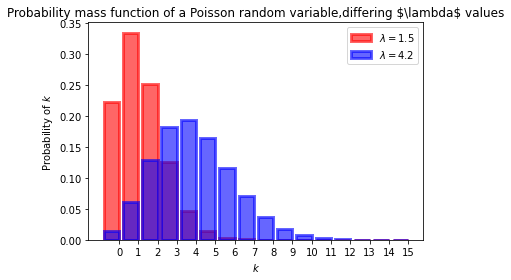

In [18]:

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colors = ["red", "blue"]
plt.bar(a, poi.pmf(a, lambda_[0]), color=colors[0],
label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
edgecolor=colors[0], lw="3")
plt.bar(a, poi.pmf(a, lambda_[1]), color=colors[1],
label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
edgecolor=colors[1], lw="3")
plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("Probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable,\
differing \$\lambda$ values");


### Binomial Distribution



### Uniform Distribution

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

In [ ]:
from scipy.stats import uniform
n, start, width = 1000, 10, 20
uni_data = uniform.rvs(size=n, loc = start, scale = width)
ax = sns.distplot(uni_data, bins = 100, kde = True, hist_kws={"linewidth":15, 'alpha':1}
    )

### Normal Distribution
Gaussian distribution (as it is also called) is attributed to several measues for stuff around, it's  everywhere: weight of apples of same variety, height of people you stumble upon daily. The values that that registered for these attributes are normally distributed: can take on any real number but the value is ofther close to average(mean).

A pymc library wich gives you access to all kind of distributions: <https://www.pymc.io/projects/docs/en/stable/api/distributions.html>.

If a distribution of values occillates around an average then it is normal distribution.
Normal distribution is of continuous type and is opposed to uniform distribution.
```python
import matplotlib.pyplot as plt
import numpy as np
import arviz as az
plt.style.use('arviz-darkgrid')
x = np.linspace(-3, 3, 500)
ls = [0., -2]
us = [2., 1]
for l, u in zip(ls, us):
    y = np.zeros(500)
    y[(x<u) & (x>l)] = 1.0/(u-l)
    plt.plot(x, y, label='lower = {}, upper = {}'.format(l, u))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.ylim(0, 1)
plt.legend(loc=1)
plt.show()

```

In [ ]:
### 

### References
1. <https://towardsdatascience.com/seven-must-know-statistical-distributions-and-their-simulations-for-data-science-681c5ac41e32>
    
2. Davidson-Pilon, Cameron. Bayesian Methods for Hackers (Addison-Wesley Data & Analytics) (p. 35). Pearson Education. Kindle Edition. 

3. <https://en.wikipedia.org/wiki/List_of_probability_distributions>